<a href="https://colab.research.google.com/github/pavanimudireddy/Breast-Cancer-Prediction-using-Decision-Tree-Classifier/blob/main/M_Pavani_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

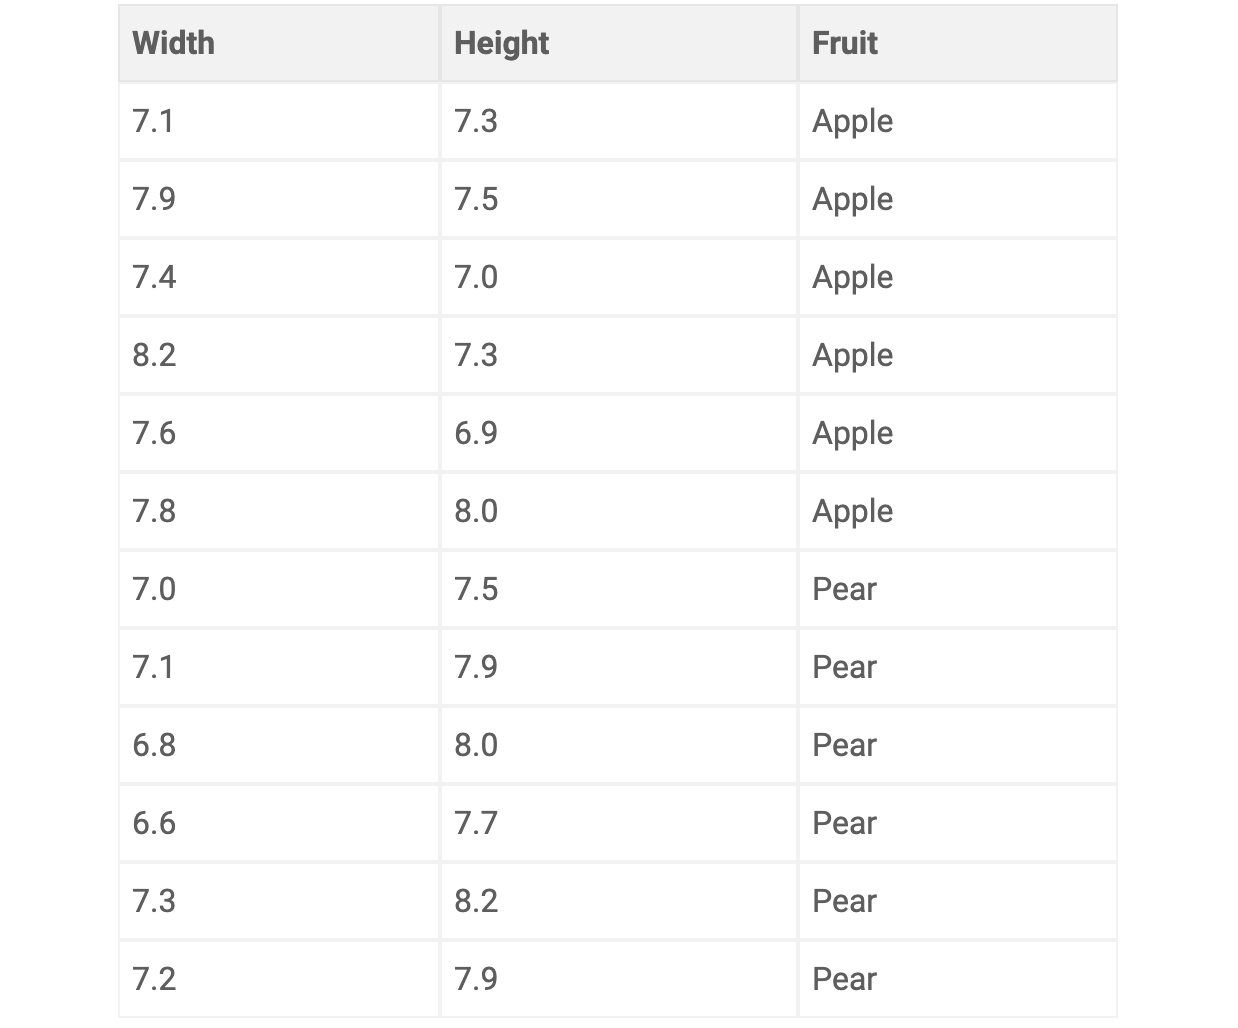

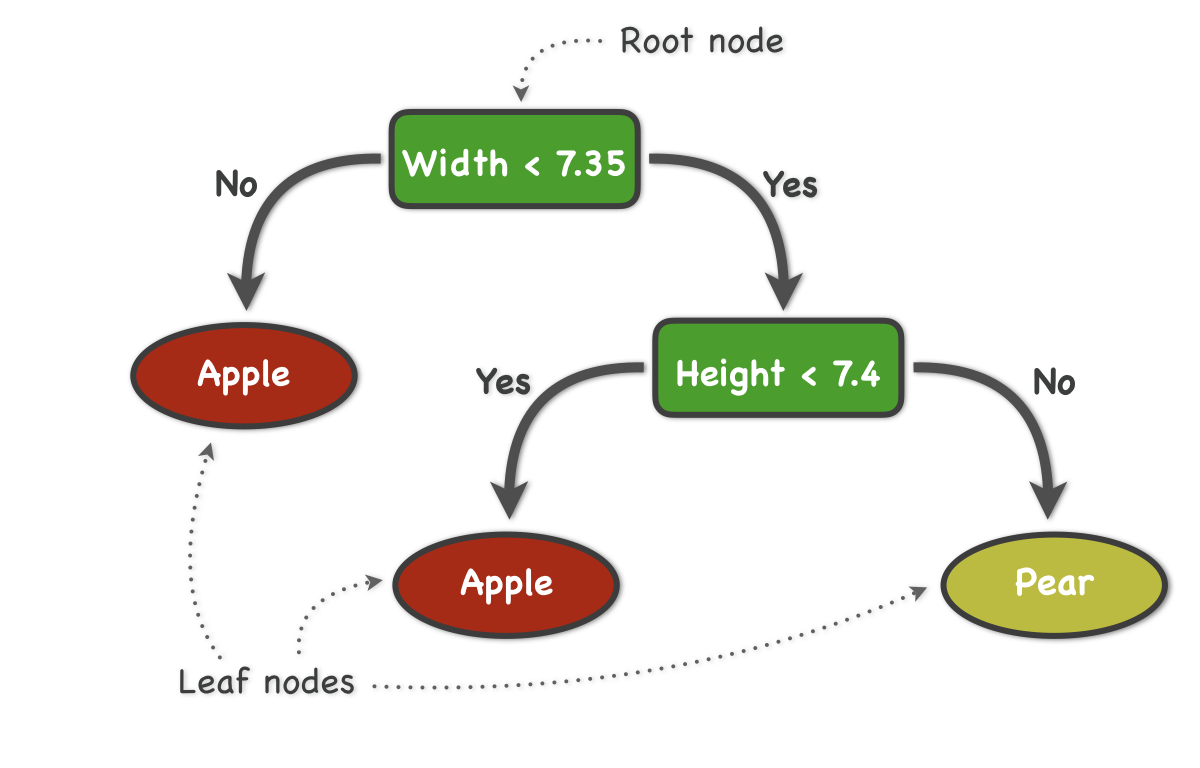

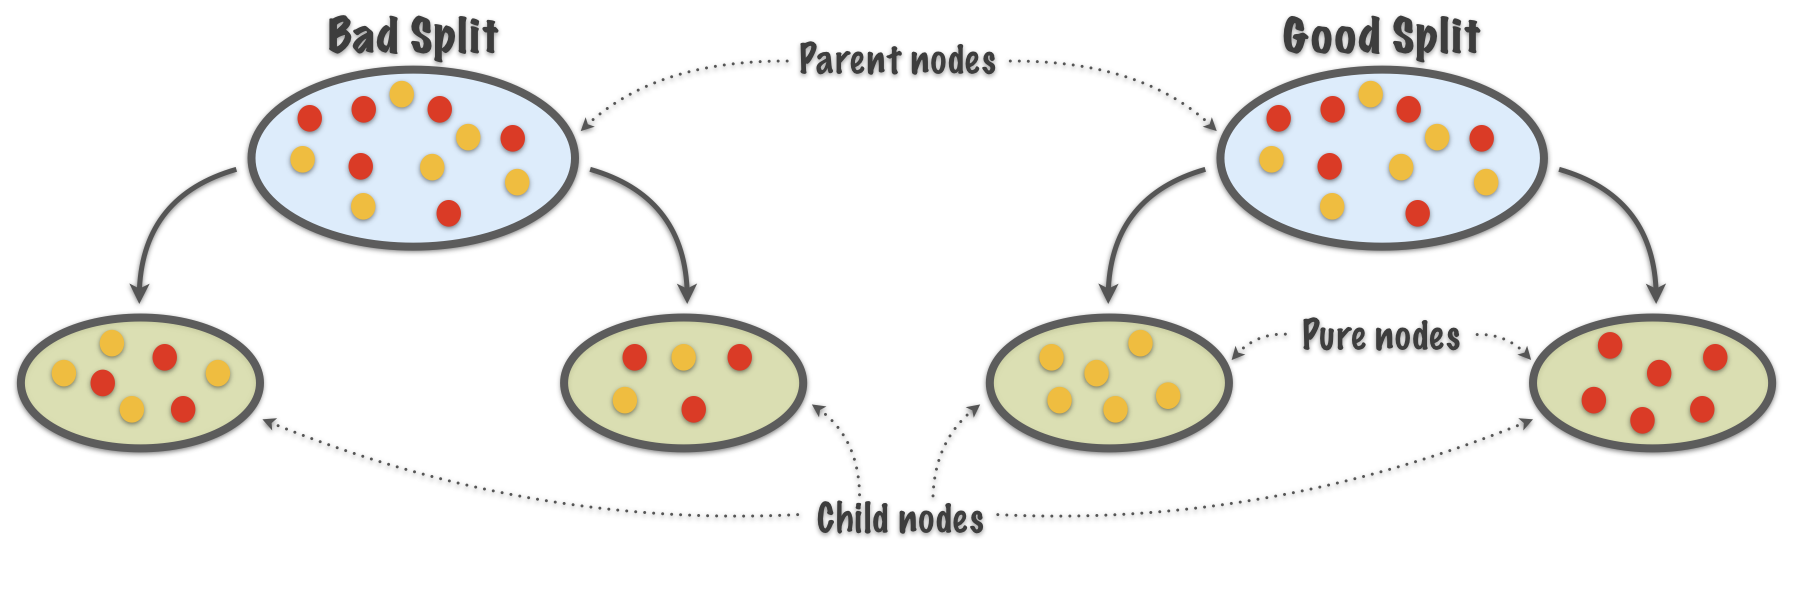

**Preprocessing**

wbc.csv file,which likely contains features related to white blood cell(WBC) characteristics and a target variable(eg.,benign or malignant classification)


In [2]:
import pandas as pd
wbc=pd.read_csv("/content/wbc.csv")
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
wbc.shape

(569, 33)

In [4]:
wbc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
import pandas as pd
# Select only numeric columns
numeric_cols = wbc.select_dtypes(include='number')
# Dictionary to store outlier indices for each column
outliers_dict = {}

for col in numeric_cols.columns:
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)]

    outliers_dict[col] = outliers.index.tolist()

# Print number of outliers per column
for col, indices in outliers_dict.items():
    print(f"{col}: {len(indices)} outliers")
#here we got outliers but we dont delete ontliers because some of the data can be lost and there is a chance of medical issue

id: 81 outliers
radius_mean: 14 outliers
texture_mean: 7 outliers
perimeter_mean: 13 outliers
area_mean: 25 outliers
smoothness_mean: 6 outliers
compactness_mean: 16 outliers
concavity_mean: 18 outliers
concave points_mean: 10 outliers
symmetry_mean: 15 outliers
fractal_dimension_mean: 15 outliers
radius_se: 38 outliers
texture_se: 20 outliers
perimeter_se: 38 outliers
area_se: 65 outliers
smoothness_se: 30 outliers
compactness_se: 28 outliers
concavity_se: 22 outliers
concave points_se: 19 outliers
symmetry_se: 27 outliers
fractal_dimension_se: 28 outliers
radius_worst: 17 outliers
texture_worst: 5 outliers
perimeter_worst: 15 outliers
area_worst: 35 outliers
smoothness_worst: 7 outliers
compactness_worst: 16 outliers
concavity_worst: 12 outliers
concave points_worst: 0 outliers
symmetry_worst: 23 outliers
fractal_dimension_worst: 24 outliers
Unnamed: 32: 0 outliers


In [6]:
wbc.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [7]:
#there are all null values presented in the unnamed column so we del the column
wbc=wbc.drop(columns=['Unnamed: 32'])

In [8]:
wbc=wbc.drop(columns=['id'])

In [9]:
wbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
wbc.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [11]:
wbc=wbc.drop_duplicates()

In [12]:
wbc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
wbc.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
X=wbc.loc[:,wbc.columns[1:]]
y=wbc.diagnosis
y=y.map({'M':1,'B':0})
y


,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


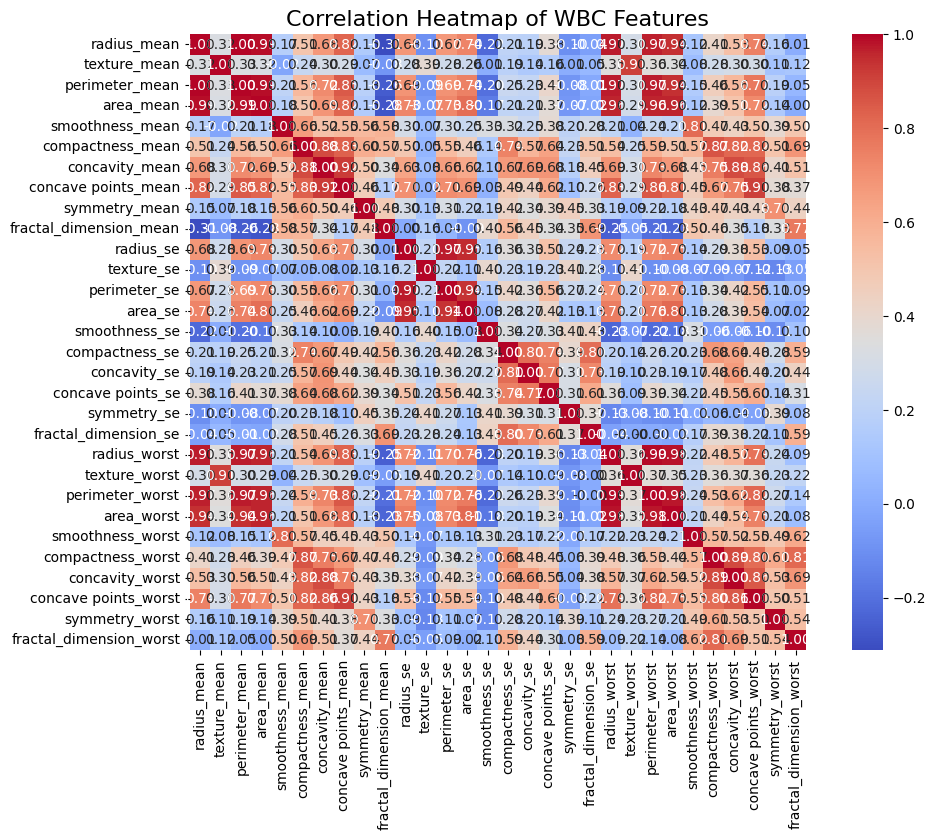

In [15]:
import matplotlib.pyplot as plt

import seaborn as sns
numeric_cols = wbc.select_dtypes(include='number')
# Compute correlation matrix
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of WBC Features", fontsize=16)
plt.show()

**split the data**

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**scaling the data**

In [17]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaler.fit(X_train)#fit learns the parameters(mean and SD)
#X_train=scaler.transform(X_train)#apply those parameter to actually change the data
#X_test=scaler.transform(X_test)
#scaling is not mandatory in DT because DT splits the data based on thresholds or question

**Decision Tree Fitting**

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#fit dt to the training data
dt.fit(X_train,y_train)#learns patterns from the training data
#it will ask all possible questions,computes the information gain and choose the best split



DecisionTreeClassifier()

**predicting the model**

In [19]:
y_pred=dt.predict(X_test)#we need to predict on the test data
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

**Evaluate the decision tree**

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy_score=accuracy_score(y_test,y_pred)
precision_score=precision_score(y_test,y_pred)
recall_score=recall_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
print("Decision Tree Results:")
print(f"Accuracy : {accuracy_score}")
print(f"precision : {precision_score}")
print(f"recall : {recall_score}")
print(f"f1_score : {f1_score}")


Decision Tree Results:
Accuracy : 0.9298245614035088
precision : 0.8805970149253731
recall : 0.9365079365079365
f1_score : 0.9076923076923077


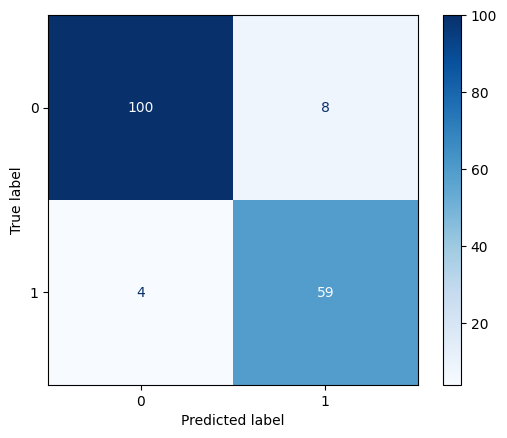

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       108
           1       0.88      0.94      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [23]:
from sklearn.metrics import roc_auc_score
y_proba = dt.predict_proba(X_test)[:, 1]
# Calculate AUROC score
auroc = roc_auc_score(y_test, y_proba)
# Print AUROC score
print(f"AUROC Score: {auroc:.4f}")


AUROC Score: 0.9312


**Reducing Overfitting**

In [24]:
#there are 1 parameter to play with -max depth -to choose the best parameter,I will try different combinations and choose the one which has the best accuracy/aur/any eval metric on cross validation or test data set
from sklearn.model_selection import cross_val_score#this will be helped to do cross validation score
import numpy as np
for depth in [1,2,3,4,5,6,7,8,9,10,20]:#hit and trail method
 dt=DecisionTreeClassifier(max_depth=depth)#tell the dt not to grow past the given threshold
 dt.fit(X_train,y_train)#the model is trained
 trainAccuracy = dt.score(X_train, y_train)
 dt=DecisionTreeClassifier(max_depth=depth)#a fresh model which is not trained yet
 valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
 print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score:",np.mean(valAccuracy))



Depth  :  1  Training Accuracy :  0.9246231155778895  Cross val score: 0.8917948717948718
Depth  :  2  Training Accuracy :  0.9422110552763819  Cross val score: 0.9121794871794873
Depth  :  3  Training Accuracy :  0.9698492462311558  Cross val score: 0.9196153846153846
Depth  :  4  Training Accuracy :  0.9949748743718593  Cross val score: 0.9119871794871794
Depth  :  5  Training Accuracy :  0.9949748743718593  Cross val score: 0.9068589743589743
Depth  :  6  Training Accuracy :  0.9974874371859297  Cross val score: 0.9143589743589745
Depth  :  7  Training Accuracy :  1.0  Cross val score: 0.9094230769230769
Depth  :  8  Training Accuracy :  1.0  Cross val score: 0.9117307692307695
Depth  :  9  Training Accuracy :  1.0  Cross val score: 0.9093589743589744
Depth  :  10  Training Accuracy :  1.0  Cross val score: 0.9092948717948719
Depth  :  20  Training Accuracy :  1.0  Cross val score: 0.9118589743589745


**Visualising the decision boundary**

 Visualize the back end process of your algorithm and also used to see linear decision boundary

In [25]:
!pip install mlxtend==0.22.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.4
    Uninstalling mlxtend-0.23.4:
      Successfully uninstalled mlxtend-0.23.4


In [26]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
#used for any decision trees
def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained
    in the 2D dataset (X,y) along with the decision
    regions of two trained classification models contained in the
    list 'models'.

    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers

    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])#legends means classifications means 0 and 1
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    #when we are predicting the model we must and should have two categories

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

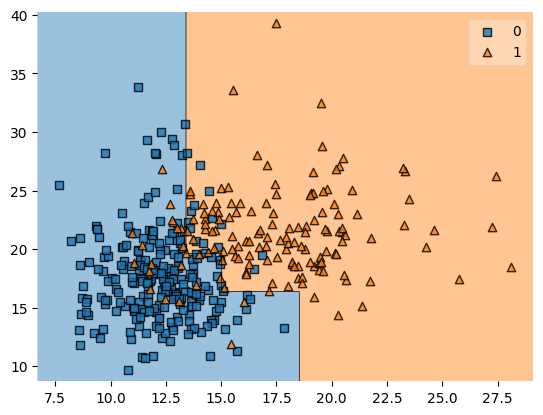

In [27]:
#using this to visually compare two calssifiers on the same data
from sklearn.linear_model import LogisticRegression#used to visualize the decision boundaries created by the decision tree classifier on the training data
dt=DecisionTreeClassifier(max_depth=3)
X_train=X_train.loc[:,['radius_mean','texture_mean']]# here we use only two features because plot decision regions works with only two input features
X_test=X_test.loc[:,['radius_mean','texture_mean']]
dt.fit(X_train,y_train)# train the decision tree classifier on the training data

# Instantiate logreg
logreg=LogisticRegression(random_state=1)
logreg.fit(X_train,y_train)

clfs=[logreg,dt]#store both classifier in alist for comparison

# Review the decision regions of the two classifier
plot_decision_regions(X_train.values,y_train.values,dt)



In [28]:
X_train.columns

Index(['radius_mean', 'texture_mean'], dtype='object')

#Feature Importances

In [29]:
#to know which feature is more important based on score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

import matplotlib.pyplot as plt
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)# fit dt to the training set
importance=dt.feature_importances_# get the importance of each each feature in the trained model in number format btw 0 to 1
list(zip(importance,X_test.columns))#gives feature importance with feature name


[(np.float64(0.0), 'radius_mean'),
 (np.float64(0.06477777053877316), 'texture_mean'),
 (np.float64(0.0), 'perimeter_mean'),
 (np.float64(0.0), 'area_mean'),
 (np.float64(0.0), 'smoothness_mean'),
 (np.float64(0.0), 'compactness_mean'),
 (np.float64(0.0), 'concavity_mean'),
 (np.float64(0.0), 'concave points_mean'),
 (np.float64(0.0), 'symmetry_mean'),
 (np.float64(0.0), 'fractal_dimension_mean'),
 (np.float64(0.0065625349718036055), 'radius_se'),
 (np.float64(0.0), 'texture_se'),
 (np.float64(0.0), 'perimeter_se'),
 (np.float64(0.003487543007158106), 'area_se'),
 (np.float64(0.0), 'smoothness_se'),
 (np.float64(0.0), 'compactness_se'),
 (np.float64(0.0), 'concavity_se'),
 (np.float64(0.0), 'concave points_se'),
 (np.float64(0.0), 'symmetry_se'),
 (np.float64(0.0), 'fractal_dimension_se'),
 (np.float64(0.0), 'radius_worst'),
 (np.float64(0.0), 'texture_worst'),
 (np.float64(0.0), 'perimeter_worst'),
 (np.float64(0.7547552847657873), 'area_worst'),
 (np.float64(0.0), 'smoothness_worst')

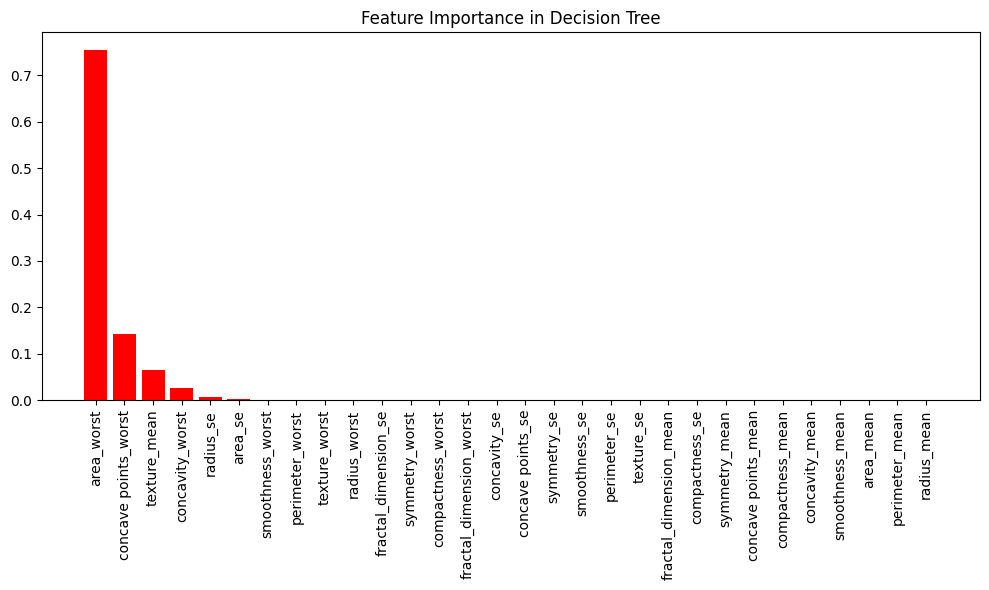

In [30]:
import matplotlib.pyplot as plt
import numpy as np

importances = dt.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10,6))
indices = np.argsort(importances)[::-1]
plt.bar(range(len(importances)), importances[indices], color='red')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title("Feature Importance in Decision Tree")
plt.tight_layout()
plt.show()

#Visualizing the tree

[Text(0.5833333333333334, 0.9, 'x[23] <= 884.55\ngini = 0.47\nsamples = 455\nvalue = [283, 172]'),
 Text(0.35714285714285715, 0.7, 'x[27] <= 0.16\ngini = 0.167\nsamples = 304\nvalue = [276, 28]'),
 Text(0.47023809523809523, 0.8, 'True  '),
 Text(0.19047619047619047, 0.5, 'x[27] <= 0.132\ngini = 0.074\nsamples = 285\nvalue = [274, 11]'),
 Text(0.09523809523809523, 0.3, 'x[13] <= 38.605\ngini = 0.03\nsamples = 259\nvalue = [255, 4]'),
 Text(0.047619047619047616, 0.1, 'gini = 0.016\nsamples = 249\nvalue = [247.0, 2.0]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.2857142857142857, 0.3, 'x[1] <= 20.94\ngini = 0.393\nsamples = 26\nvalue = [19, 7]'),
 Text(0.23809523809523808, 0.1, 'gini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5238095238095238, 0.5, 'x[23] <= 656.3\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.47619047619047616, 0.3, 'x[10] <= 0.249\ngini 

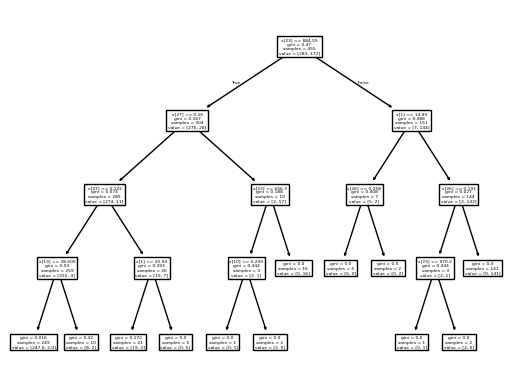

In [31]:
from sklearn import tree
tree.plot_tree(dt)#plots the structure of trained dt

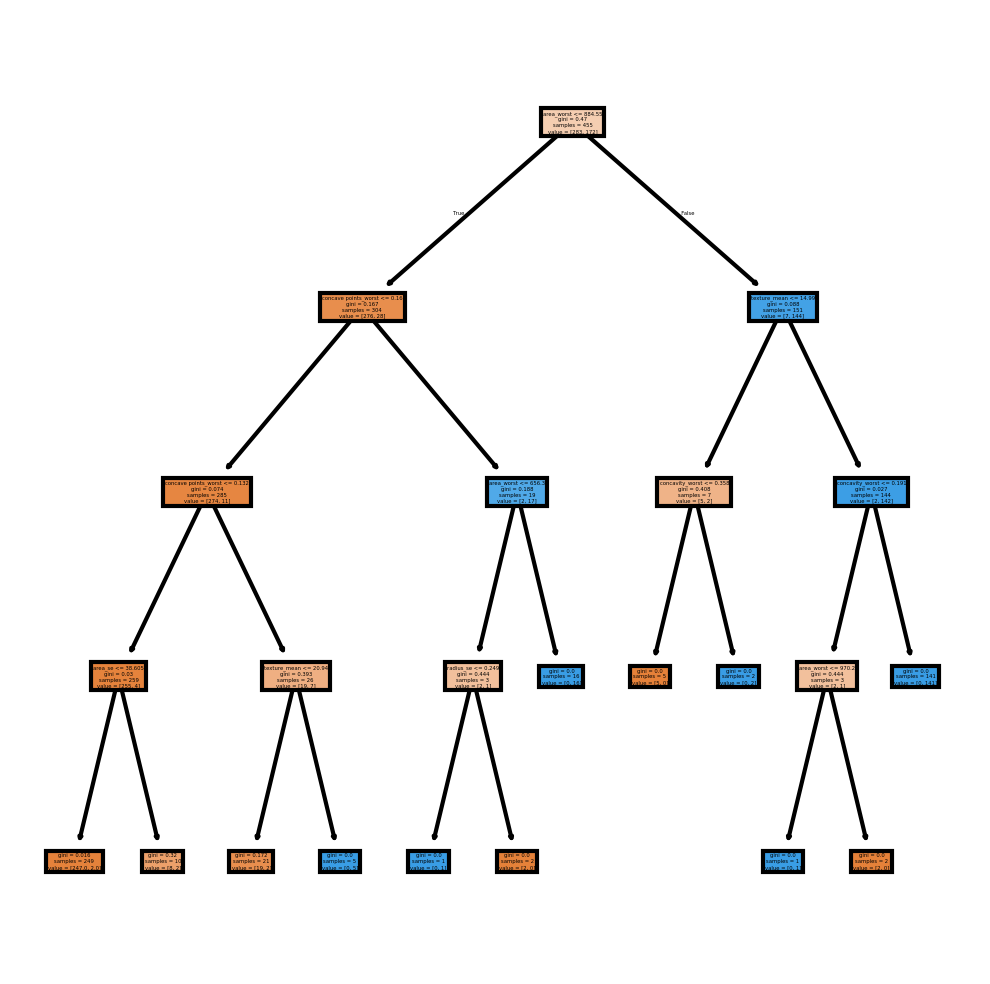

In [32]:
#to visualize the trained decision model
import matplotlib.pyplot as plt
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(dt,feature_names=X_test.columns,filled=True)
fig.savefig('imagename.png')

In [33]:
dt.predict_proba(X_test)

array([[0.99196787, 0.00803213],
       [0.        , 1.        ],
       [0.99196787, 0.00803213],
       [0.99196787, 0.00803213],
       [0.8       , 0.2       ],
       [0.        , 1.        ],
       [0.99196787, 0.00803213],
       [0.99196787, 0.00803213],
       [1.        , 0.        ],
       [0.99196787, 0.00803213],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.9047619 , 0.0952381 ],
       [0.99196787, 0.00803213],
       [0.99196787, 0.00803213],
       [0.99196787, 0.00803213],
       [0.99196787, 0.00803213],
       [0.99196787, 0.00803213],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.99196787, 0.00803213],
       [0.        , 1.        ],
       [0.99196787, 0.00803213],
       [1.        , 0.        ],
       [0.99196787, 0.00803213],
       [0.99196787, 0.00803213],
       [0.        , 1.        ],
       [0.

In [34]:
X_test.iloc[0,:].values

array([1.166e+01, 1.707e+01, 7.370e+01, 4.210e+02, 7.561e-02, 3.630e-02,
       8.306e-03, 1.162e-02, 1.671e-01, 5.731e-02, 3.534e-01, 6.724e-01,
       2.225e+00, 2.603e+01, 6.583e-03, 6.991e-03, 5.949e-03, 6.296e-03,
       2.216e-02, 2.668e-03, 1.328e+01, 1.974e+01, 8.361e+01, 5.425e+02,
       9.958e-02, 6.476e-02, 3.046e-02, 4.262e-02, 2.731e-01, 6.825e-02])

In [35]:
#clean data
#encode the target variable
#split the data
#scale
#use the hit and trail method to find best depth , best quest at what depth
#agin fit the model by the best depth
#predict the model
#evaluate the model
#visualise the model use the tree plot